# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.156109e+01     1.486795e+01
 * time: 0.10316991806030273
     1     6.708855e+01     1.169030e+01
 * time: 0.1120297908782959
     2     6.020041e+01     1.440962e+01
 * time: 0.1331338882446289
     3     4.591810e+01     9.951994e+00
 * time: 0.16338086128234863
     4     3.669246e+01     7.849232e+00
 * time: 0.19220280647277832
     5     1.768724e+01     2.482839e+00
 * time: 0.22241878509521484
     6     1.273672e+01     4.113270e+00
 * time: 0.2533559799194336
     7     1.072001e+01     3.961722e+00
 * time: 0.2890198230743408
     8     9.294154e+00     2.931184e+00
 * time: 0.32445693016052246
     9     8.062678e+00     2.259792e+00
 * time: 0.4151489734649658
    10     7.947470e+00     4.048660e+00
 * time: 0.4318878650665283
    11     7.184151e+00     2.881921e+00
 * time: 0.44882678985595703
    12     6.640657e+00     2.244629e+00
 * time: 0.46576499938964844
    13     6.346112e+00     2.070920e+00
 * time: 0.482

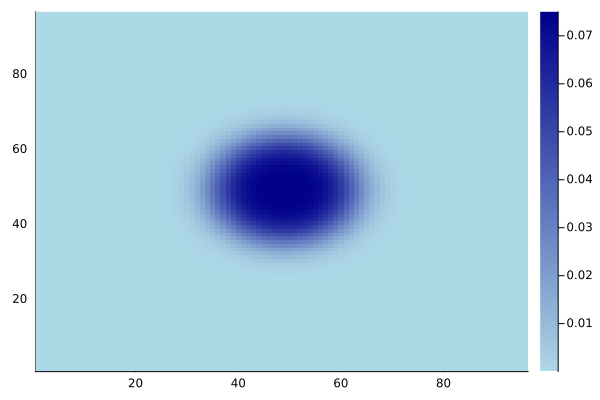

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)